In [1]:
import os
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn import datasets
from collections import Counter

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
iris = datasets.load_iris()


c:\users\shang\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\shang\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\shang\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


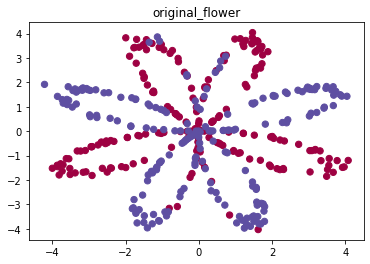

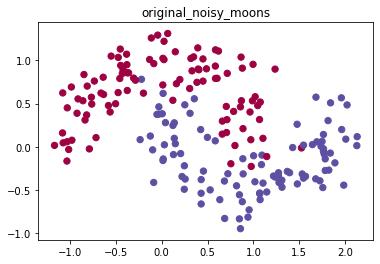

In [108]:
# First Dataset
datas = []
X, Y = load_planar_dataset()
name = 'flower'
X = X.T
Y = Y[0]
datas.append((name, X, Y))

# Second Dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datas.append(("noisy_moons", noisy_moons[0], noisy_moons[1]))

# Visualize
for name, X, Y in datas:
    plt.scatter(X[:, 0], X[:, 1], c=Y , s=40, cmap=plt.cm.Spectral);
    plt.title(name+'_original')
    plt.title('original_' + name)
    plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
for name, X, Y in datas:
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X,Y)
    y_predict = clf.predict(X)
    print(str((sum(y_predict == Y))/len(Y)*100) + "%")
    

88.25%
96.0%


In [26]:
from sklearn.metrics import log_loss
import numpy as np
print(log_loss([0, 0, 1], [0.0001, 0.0001, 0.9999]))
print(log_loss([0, 0, 1], [0.9999, 0.9999, 0.0001]))

def logloss(y, yhat):
    return -(y)*np.log(yhat)-(1-y)*np.log(1-yhat)
print(logloss(1, 0.9999))
print(logloss(1, 0.0001))



0.00010000500033334734
9.210340371976256
0.00010000500033334732
9.210340371976182


In [28]:
def entropy(p, n):
    # 請定義出entropy的function，注意若出現0乘上無限大也等於0。
    #=============your works starts===============#
    p_pn = p / (p+n)
    n_pn = n / (p+n)
    lpp = p_pn*np.log2(p_pn) if p_pn != 0 else 0
    lpn = n_pn*np.log2(n_pn) if n_pn != 0 else 0
    entropy = -(lpp + lpn)
    #==============your works ends================#
    return entropy 

print(entropy(0.5, 0.5))
print(entropy(1, 0))
print(entropy(100 , 100))
# print(entropy(0.5, 0.5)*2)
# print(entropy(0.4, 0.5) + entropy(0.6, 0.5))

# 1.0
# 0.0

1.0
-0.0
1.0


In [53]:
df = pd.read_csv(os.path.join("dataset", "buy_computers"))
df

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,30…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,30…40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [41]:
age = df.groupby('age')
age.size()

age
30…40    4
<=30     5
>40      5
dtype: int64

In [47]:
df.groupby('age').size().to_dict()

{'30…40': 4, '<=30': 5, '>40': 5}

In [42]:
age.size().to_dict()

{'30…40': 4, '<=30': 5, '>40': 5}

In [49]:
col_candidates = ['age', 'income', 'student', 'credit_rating']
dict_search_1st = {}
for col in col_candidates:
    dict_search_1st[col] = df.groupby(col).size().to_dict()
    
pprint(dict_search_1st)

{'age': {'30…40': 4, '<=30': 5, '>40': 5},
 'credit_rating': {'excellent': 6, 'fair': 8},
 'income': {'high': 4, 'low': 4, 'medium': 6},
 'student': {'no': 7, 'yes': 7}}


In [57]:
col = 'age'
df.groupby([col,'buys_computer']).size().to_dict()

{('30…40', 'yes'): 4,
 ('<=30', 'no'): 3,
 ('<=30', 'yes'): 2,
 ('>40', 'no'): 2,
 ('>40', 'yes'): 3}

In [98]:
dict_search_2nd ={}
for col in ['age', 'income', 'student', 'credit_rating']:
    dict_search_2nd[col] = df.groupby([col,'buys_computer']).size().to_dict()
    
pprint(dict_search_2nd)


{'age': {('30…40', 'yes'): 4,
         ('<=30', 'no'): 3,
         ('<=30', 'yes'): 2,
         ('>40', 'no'): 2,
         ('>40', 'yes'): 3},
 'credit_rating': {('excellent', 'no'): 3,
                   ('excellent', 'yes'): 3,
                   ('fair', 'no'): 2,
                   ('fair', 'yes'): 6},
 'income': {('high', 'no'): 2,
            ('high', 'yes'): 2,
            ('low', 'no'): 1,
            ('low', 'yes'): 3,
            ('medium', 'no'): 2,
            ('medium', 'yes'): 4},
 'student': {('no', 'no'): 4,
             ('no', 'yes'): 3,
             ('yes', 'no'): 1,
             ('yes', 'yes'): 6}}


In [99]:
dict_search_2nd['age'].get(('>40', 'yes')), dict_search_2nd['age'].get(('>40', 'no')) 

(3, 2)

In [67]:
p, n = dict_search_2nd['age'].get(('>40', 'yes')), dict_search_2nd['age'].get(('>40', 'no')) 
entropy(p,n)

0.9709505944546686

In [101]:
dict_search_2nd['age'].get(('30…40', 'yes')), dict_search_2nd['age'].get(('30…40', 'no'),0) 

(4, 0)

In [100]:
p, n = dict_search_2nd['age'].get(('30…40', 'yes')), dict_search_2nd['age'].get(('30…40', 'no'),0) 
entropy(p,n)

-0.0

In [82]:
df.groupby('buys_computer').size().values

array([5, 9], dtype=int64)

In [102]:
# dict_gb_bc: 以buys_computer進行groupby計算出原始買電腦跟不買電腦的人數
# entropy_ori: 請使用dict_gb_bc['yes'], dict_gb_bc['no']計算原始的entropy
#=============your works starts===============#
dict_gb_bc = df.groupby('buys_computer').size().values
entropy_ori = entropy(*dict_gb_bc)
#==============your works ends================#

print(entropy_ori)

0.9402859586706311


In [103]:
col = 'age'
groups = dict_search_1st.get(col).keys()
weighted_entropy = 0
for g in groups:
    p = dict_search_2nd[col].get((g, 'yes'), 0)
    n = dict_search_2nd[col].get((g, 'no'), 0)
    e = entropy(p,n)
    weighted_entropy += e * (p+n)
    print(g, e)
    print(weighted_entropy)
    print("========")
    weighted_entropy /= sum(dict_search_1st.get(col).values())
    weighted_entropy

30…40 -0.0
0.0
<=30 0.9709505944546686
4.854752972273343
>40 0.9709505944546686
5.201521041721439


In [106]:
from sklearn.tree import DecisionTreeClassifier  ## decision tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

c:\users\shang\appdata\local\programs\python\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Accuracy 100.0%


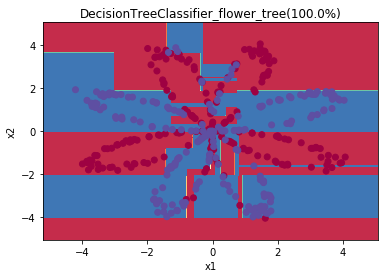

D:\AI_lab\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 99.0%


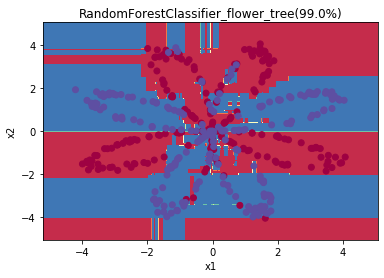

Accuracy 81.25%


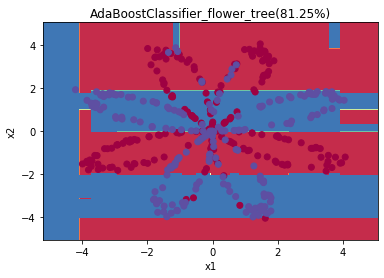

Accuracy 91.25%


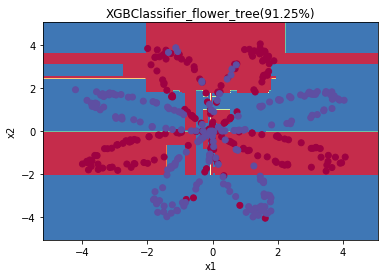

Accuracy 100.0%


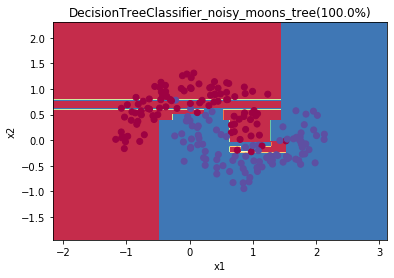

D:\AI_lab\IIIMaterial\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy 98.5%


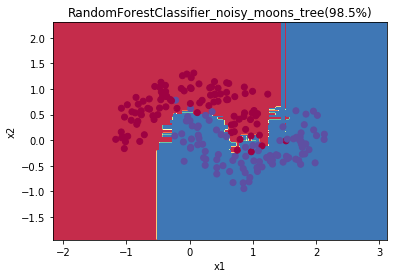

Accuracy 100.0%


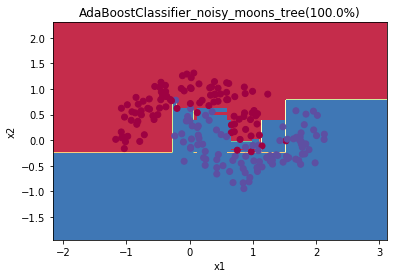

Accuracy 97.5%


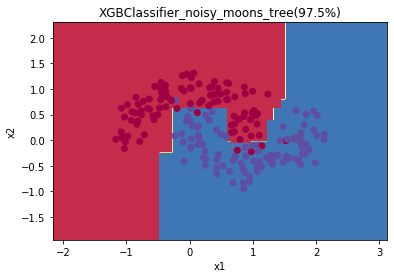

In [110]:
clfs={
"DecisionTreeClassifier":DecisionTreeClassifier,
"RandomForestClassifier":RandomForestClassifier,
"AdaBoostClassifier":AdaBoostClassifier,
"XGBClassifier":XGBClassifier
}
for name, X, Y in datas:
    for clf_name, clf in clfs.items():
        clf = clf()
        clf.fit(X, Y)

        y_pred = clf.predict(X)
        print('Accuracy',  str((Y == y_pred).sum()/ X.shape[0]*100)+"%")
        plot_decision_boundary(lambda x: clf.predict(x), X.T, Y)
        plt.title(clf_name + "_" + name +'_tree(' + str((Y == y_pred).sum()/ X.shape[0]*100)+"%)")
        plt.show()


In [112]:
X_iris = iris.data
Y_iris_true = iris.target

df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names


df['type'] = [folwer_type.get(i) for i in iris.target]
df1 = df[df['type'] == list(folwer_type.values())[0]][:5].copy()
df2 = df[df['type'] == list(folwer_type.values())[1]][:5].copy()
df3 = df[df['type'] == list(folwer_type.values())[2]][:5].copy()
pd.concat([df1, df2, df3])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [115]:
#請使用XGBClassifier()來訓練iris dataset
#=============your works starts===============#
xgb = XGBClassifier()
Y_iris_predict = xgb.fit(X_iris, Y_iris_true).predict(X_iris)
# xgb = XGBClassifier().fit(X_iris, Y_iris_true)
# Y_iris_predict = xgb.predict(X_iris)
#==============your works ends================#

print(Y_iris_predict)
print(Counter(Y_iris_predict))
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
#  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
#  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
#  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
#  2 2]
# Counter({0: 50, 1: 50, 2: 50})

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Counter({0: 50, 1: 50, 2: 50})


In [121]:
Y_iris_true == Y_iris_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [122]:
accuracy = np.sum(Y_iris_true == Y_iris_predict)/len(Y_iris_predict)
accuracy

1.0